In [1]:
#importing the libraries
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv(r"C:\Users\anant\Downloads\seeds.csv")
data.head()

,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASSYMMETRY_COEFFICIENT,GROOVE_LENGTH,TYPE
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
data.shape

(140, 8)

In [4]:
data.isnull().sum()

AREA                      0
PERIMETER                 0
COMPACTNESS               0
LENGTH                    0
WIDTH                     0
ASSYMMETRY_COEFFICIENT    0
GROOVE_LENGTH             0
TYPE                      0
dtype: int64

In [5]:
data.describe()

,AREA,PERIMETER,COMPACTNESS,LENGTH,WIDTH,ASSYMMETRY_COEFFICIENT,GROOVE_LENGTH,TYPE
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,16.334357,15.215000,0.881794,5.828043,3.461021,3.156101,5.553907,1.500000
std,2.406400,1.099006,0.015887,0.406740,0.282686,1.272003,0.534693,0.501795
min,11.230000,12.630000,0.839200,4.902000,2.850000,0.765100,4.519000,1.000000
25%,14.362500,14.335000,0.871450,5.519000,3.239250,2.220000,5.095500,1.000000
50%,16.130000,15.130000,0.881850,5.808500,3.463500,2.973000,5.530500,1.500000
75%,18.720000,16.205000,0.894250,6.146750,3.693250,4.022000,5.976250,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,6.685000,6.550000,2.000000


In [10]:
df=data[['LENGTH','WIDTH']]
x=df.to_numpy()

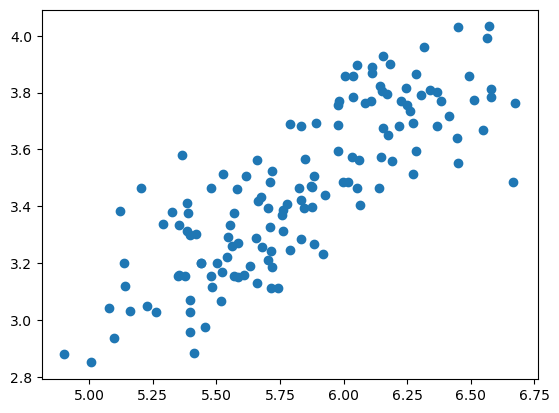

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0], x[:,1])

In [14]:
n=len(x)
#no. of clusters required=3 
k=3

In [16]:
centers=x[np.random.choice(n,k, replace=False)]
print(centers)

[[5.658 3.562]
 [6.154 3.93 ]
 [5.979 3.687]]


In [17]:
((x[0]-centers[0])**2).sum()**0.5

0.27115493725912476

In [18]:
((x-centers[0])**2).sum(axis=1)

array([0.073525, 0.063257, 0.185314, 0.145045, 0.      , 0.136484,
       0.100834, 0.124244, 0.165434, 0.054325, 0.105536, 0.178721,
       0.17973 , 0.196877, 0.23168 , 0.14669 , 0.322562, 0.019465,
       0.214425, 0.449793, 0.187489, 0.17428 , 0.004625, 0.704357,
       0.11765 , 0.050506, 0.356465, 0.436405, 0.12997 , 0.267173,
       0.386185, 0.046282, 0.144857, 0.175073, 0.057672, 0.00853 ,
       0.037828, 0.044917, 0.07508 , 0.137817, 0.260936, 0.257465,
       0.400721, 0.075517, 0.016241, 0.245173, 0.03041 , 0.041969,
       0.08621 , 0.092816, 0.089429, 0.01664 , 0.20485 , 0.155485,
       0.20849 , 0.124436, 0.107125, 0.097576, 0.020465, 0.529901,
       0.929444, 1.038025, 0.609124, 0.311233, 0.444112, 0.46561 ,
       0.139168, 0.165617, 0.175202, 0.522916, 0.28409 , 0.121684,
       0.103424, 0.38144 , 0.134657, 0.087737, 0.190117, 0.911745,
       0.625298, 0.03688 , 0.056114, 0.208129, 0.484333, 0.571176,
       0.558385, 0.273146, 0.22228 , 0.805545, 1.059066, 0.848

In [20]:
distances = np.zeros((n,k))
for i in range(k):
    distances[:,i] = ((x-centers[i])**2).sum(axis=1)**0.5
distances

array([[0.27115494, 0.73130363, 0.43275975],
       [0.25150944, 0.84640948, 0.55311934],
       [0.43048113, 1.0470998 , 0.77190932],
       [0.38084774, 0.99624344, 0.72380177],
       [0.        , 0.61760829, 0.34447932],
       [0.36943741, 0.98577279, 0.70162241],
       [0.3175437 , 0.89415994, 0.59685844],
       [0.35248262, 0.96599172, 0.67875327],
       [0.40673579, 0.47584241, 0.23400855],
       [0.23307724, 0.50351266, 0.20530222],
       [0.32486305, 0.81666639, 0.51792857],
       [0.42275407, 1.02181065, 0.7272393 ],
       [0.42394575, 1.022539  , 0.72783515],
       [0.44370824, 1.02698637, 0.72935657],
       [0.48133149, 1.05709035, 0.75851038],
       [0.38300131, 1.00060881, 0.72090221],
       [0.56794542, 1.17065537, 0.91214911],
       [0.13951702, 0.75245266, 0.48397624],
       [0.46306047, 1.05636026, 0.80493292],
       [0.67066609, 1.27958782, 0.98694123],
       [0.433     , 0.94213428, 0.64374296],
       [0.41746856, 0.99126182, 0.69285063],
       [0.

In [21]:
#update cluster members
from scipy.spatial.distance import cdist
distances=cdist(x,centers)
closest=np.argmin(distances,axis=1)
#plt.scatter(center[0],center[1],marker = '*',c = 'red')

In [22]:
x[closest==0].mean(axis=0)

array([5.53050633, 3.26135443])

In [23]:
# update centers
for i in range(k):
    centers[i, :] = x[closest == i].mean(axis=0)
centers

array([[5.53050633, 3.26135443],
       [6.33397143, 3.80562857],
       [6.05103846, 3.60380769]])

In [24]:
centers = x[np.random.choice(n, k, replace=False)]
closest = np.zeros(n).astype(int)

while True:
    old_closest = closest.copy()
    print(closest)
    distances = cdist(x, centers)
    closest = np.argmin(distances, axis=1)
    
    for i in range(k):
        centers[i, :] = x[closest == i].mean(axis=0)
        
    if all(closest == old_closest):
        break

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[2 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 1
 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 2 2 2 0 1 2 2 1]
[2 0 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 2 2 0 2 2 2
 2 2 0 0 0 0 2 2 0 2 0 0 2 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 2 1 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 0 1 1 1 1 2 1 1 2 2 2 0 1 2 2 2]
[2 0 0 0 2 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 0 0 2 0 2 2 0 0 0 0 0 2 2 0 2 2 2
 2 2 0 0 0 0 2 2 0 2 2 0 2 0 2 2 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 2

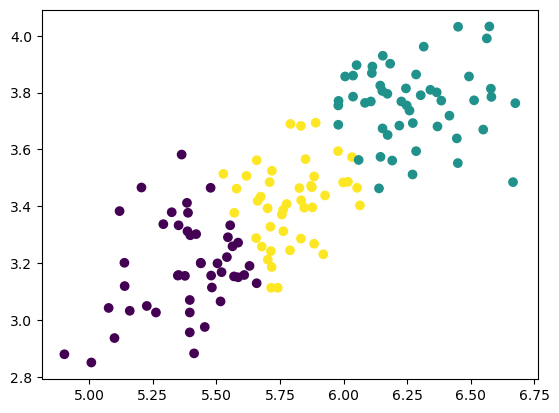

In [25]:
plt.scatter(x[:,0],x[:,1],c=closest)

In [1]:
import pandas as pd
import numpy as np

# Load the data from the Excel file
data=pd.read_csv(r"C:\Users\anant\Downloads\Data_Ass2.csv")
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Function to split data into train and test sets
def train_test_split(data, test_ratio=0.1):
    data_array = data.values
    np.random.shuffle(data_array)
    
    split_idx = int(len(data_array) * (1 - test_ratio))
    train_data = data_array[:split_idx]
    test_data = data_array[split_idx:]
    
    # Convert back to DataFrames if needed
    train_data = pd.DataFrame(train_data, columns=data.columns)
    test_data = pd.DataFrame(test_data, columns=data.columns)
    
    return train_data, test_data
# Split data into train and test sets
train_data, test_data = train_test_split(data, test_ratio=0.1)

In [5]:
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,0.0,120.0,237.0,0.0,1.0,71.0,0.0,1.0,1.0,0.0,2.0,0.0
1,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0,1.0
2,58.0,0.0,3.0,150.0,283.0,1.0,0.0,162.0,0.0,1.0,2.0,0.0,2.0,1.0
3,52.0,1.0,1.0,134.0,201.0,0.0,1.0,158.0,0.0,0.8,2.0,1.0,2.0,1.0
4,42.0,1.0,2.0,130.0,180.0,0.0,1.0,150.0,0.0,0.0,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,62.0,0.0,0.0,140.0,268.0,0.0,0.0,160.0,0.0,3.6,0.0,2.0,2.0,0.0
268,39.0,0.0,2.0,138.0,220.0,0.0,1.0,152.0,0.0,0.0,1.0,0.0,2.0,1.0
269,51.0,0.0,2.0,120.0,295.0,0.0,0.0,157.0,0.0,0.6,2.0,0.0,2.0,1.0
270,53.0,1.0,2.0,130.0,197.0,1.0,0.0,152.0,0.0,1.2,0.0,0.0,2.0,1.0


In [10]:
# Function to train the Naive Bayes model
def train_naive_bayes(train_data):
    separated = {}
    
    # Separate data by class
    for i in range(len(train_data)):
        age = train_data['age'].iloc[i]
        sex = train_data['sex'].iloc[i]
        cp = train_data['cp'].iloc[i]
        trestbps = train_data['trestbps'].iloc[i]
        chol = train_data['chol'].iloc[i]
        fbs = train_data['fbs'].iloc[i]
        restecg = train_data['restecg'].iloc[i]
        thalach = train_data['thalach'].iloc[i]
        exang = train_data['exang'].iloc[i]
        oldpeak = train_data['oldpeak'].iloc[i]
        slope = train_data['slope'].iloc[i]
        ca = train_data['ca'].iloc[i]
        thal = train_data['thal'].iloc[i]
        target = train_data['target'].iloc[i]
        
        if target not in separated:
            separated[target] = []
        
        separated[target].append((age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal))
    
    # Calculate mean and standard deviation for each feature in each class
    summaries = {}
    for class_value, instances in separated.items():
        summaries[class_value] = [(np.mean(feature), np.std(feature)) for feature in zip(*instances)]
    
    return summaries

# Train the Naive Bayes model
model = train_naive_bayes(train_data)


In [11]:
model

{0.0: [(56.357142857142854, 7.713587563940398),
  (0.8174603174603174, 0.38628868329009397),
  (0.5, 0.9063269671749657),
  (134.52380952380952, 18.556526377579775),
  (251.96825396825398, 49.58781476473679),
  (0.16666666666666666, 0.37267799624996495),
  (0.46825396825396826, 0.5446202687078654),
  (140.1031746031746, 22.192101184909458),
  (0.5396825396825397, 0.49842280851135184),
  (1.5873015873015874, 1.3160175691754397),
  (1.1746031746031746, 0.5645529918659916),
  (1.1349206349206349, 1.0339719578277742),
  (2.5634920634920637, 0.6725458826152504)],
 1.0: [(51.97260273972603, 9.429584169479986),
  (0.5684931506849316, 0.4952864709531761),
  (1.356164383561644, 0.9344233151426361),
  (129.17808219178082, 15.337162733229809),
  (241.76027397260273, 54.09305842516166),
  (0.11643835616438356, 0.32074984860186556),
  (0.5753424657534246, 0.5079588004860044),
  (159.41780821917808, 18.485002009891314),
  (0.1506849315068493, 0.35774150293700263),
  (0.571917808219178, 0.76880472525

In [18]:
def calculate_probability(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

In [25]:
def calculate_class_probabilities(summaries, input_vector):
    probabilities = {}
    
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, std = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, std)
    
    return probabilities

In [30]:
# Function to predict the class for a given input vector
def predict(summaries, input_vector):
    probabilities = calculate_class_probabilities(summaries, input_vector)
    best_label, best_prob = None, -1
    
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    
    return best_label


In [36]:
input_vector

NameError: name 'input_vector' is not defined

In [35]:
test_data = [(row[:-1], row[-1]) for row in test_data]
(test_data)

[((((((((array([ 42. ,   0. ,   0. , 102. , 265. ,   0. ,   0. , 122. ,   0. ,
                  0.6,   1. ,   0. ,   2. ]),),),),),),),),
  1.0),
 ((((((((array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
                  2.3,   0. ,   0. ,   1. ]),),),),),),),),
  1.0),
 ((((((((array([ 43.,   1.,   0., 110., 211.,   0.,   1., 161.,   0.,   0.,   2.,
                  0.,   3.]),),),),),),),),
  1.0),
 ((((((((array([ 50. ,   1. ,   0. , 144. , 200. ,   0. ,   0. , 126. ,   1. ,
                  0.9,   1. ,   0. ,   3. ]),),),),),),),),
  0.0),
 ((((((((array([ 59.,   1.,   0., 164., 176.,   1.,   0.,  90.,   0.,   1.,   1.,
                  2.,   1.]),),),),),),),),
  0.0),
 ((((((((array([ 42.,   1.,   1., 120., 295.,   0.,   1., 162.,   0.,   0.,   2.,
                  0.,   2.]),),),),),),),),
  1.0),
 ((((((((array([ 42. ,   1. ,   2. , 120. , 240. ,   1. ,   1. , 194. ,   0. ,
                  0.8,   0. ,   0. ,   3. ]),),),),),),),),
  1.0),
 ((((((((a

In [28]:
len(input_vector)

NameError: name 'input_vector' is not defined

In [29]:

# Function to evaluate the model on the test set
def evaluate_model(summaries, test_data):
    predictions = [predict(summaries, x) for x, _ in test_data]
    actual_labels = [y for _, y in test_data]
    
    return predictions, actual_labels

# Evaluate the model on the test set
predictions, actual_labels = evaluate_model(model, test_data)


IndexError: tuple index out of range

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
data=pd.read_csv(r"C:\Users\anant\Downloads\Data_Ass2.csv")  # Replace 'your_data.csv' with your dataset file path

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

# Display the first few rows of the train and test data
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

# Function to calculate Gaussian probability density function
def calculate_probability(x, mean, std):
    exponent = np.exp(-((x - mean) ** 2) / (2 * std ** 2))
    return (1 / (np.sqrt(2 * np.pi) * std)) * exponent

# Function to train the Naïve Bayes model
def train_naive_bayes(train_data):
    separated = {}
    
    # Separate data by class
    for _, row in train_data.iterrows():
        x = row.drop('target').values
        y = row['target']
        if y not in separated:
            separated[y] = []
        separated[y].append(x)
    
    # Calculate mean and standard deviation for each feature in each class
    summaries = {}
    for class_value, instances in separated.items():
        summaries[class_value] = [(np.mean(feature), np.std(feature)) for feature in zip(*instances)]
    
    return summaries

# Function to calculate class probabilities
def calculate_class_probabilities(summaries, input_vector):
    probabilities = {}
    
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = 1
        for i in range(len(class_summaries)):
            mean, std = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, std)
    
    return probabilities

# Function to predict the class for a given input vector
def predict(summaries, input_vector):
    probabilities = calculate_class_probabilities(summaries, input_vector)
    best_label, best_prob = None, -1
    
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    
    return best_label

# Function to evaluate the model on the test set
def evaluate_model(summaries, test_data):
    predictions = [predict(summaries, row.drop('target').values) for _, row in test_data.iterrows()]
    actual_labels = test_data['target'].tolist()
    
    return predictions, actual_labels

# Function to calculate the confusion matrix
def confusion_matrix(predictions, actual_labels, num_classes):
    matrix = np.zeros((num_classes, num_classes))
    
    for i in range(len(predictions)):
        pred_class = int(predictions[i])
        true_class = int(actual_labels[i])
        matrix[true_class][pred_class] += 1
    
    return matrix

# Function to calculate the accuracy
def calculate_accuracy(predictions, actual_labels):
    correct = sum(1 for pred, actual in zip(predictions, actual_labels) if pred == actual)
    total = len(actual_labels)
    accuracy = correct / total
    return accuracy

# Train the Naïve Bayes model
model = train_naive_bayes(train_data)

# Evaluate the model on the test set
predictions, actual_labels = evaluate_model(model, test_data)

# Calculate and print the confusion matrix
num_classes = 2  # Assuming two classes in this example
conf_matrix = confusion_matrix(predictions, actual_labels, num_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print the accuracy
accuracy = calculate_accuracy(predictions, actual_labels)
print("Accuracy:", accuracy)


Train Data:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
284   61    1   0       140   207    0        0      138      1      1.9   
198   62    1   0       120   267    0        1       99      1      1.8   
42    45    1   0       104   208    0        0      148      1      3.0   
17    66    0   3       150   226    0        1      114      0      2.6   
168   63    1   0       130   254    0        0      147      0      1.4   

     slope  ca  thal  target  
284      2   1     3       0  
198      1   2     3       0  
42       1   0     2       1  
17       0   0     2       1  
168      1   1     3       0  

Test Data:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
179   57    1   0       150   276    0        0      112      1      0.6   
228   59    1   3       170   288    0        0      159      0      0.2   
111   57    1   2       150   126    1        1      173      0      0.2   
246   56    0   0       134  